<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week15.do.txt --no_mako -->
<!-- dom:TITLE: Advanced machine learning and data analysis for the physical sciences -->

# Advanced machine learning and data analysis for the physical sciences
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, East Lansing, Michigan, USA

Date: **April 30, 2024**

## Plans for the week of April 29- May 3, 2024

**Deep generative models.**

1. Summary of Variational Autoencoders

2. Generative Adversarial Networks (GANs), see <https://lilianweng.github.io/posts/2017-08-20-gan/> for nice overview

3. Start discussion of diffusion models, motivation mainly

4. [Video of lecture](https://youtu.be/Cg8n9aWwHuU)

5. [Whiteboard notes](https://github.com/CompPhysics/AdvancedMachineLearning/blob/main/doc/HandwrittenNotes/2024/NotesApril30.pdf)

## Readings

1. Reading recommendation: Goodfellow et al, for GANs see sections 20.10-20.11

2. For codes and background, see Raschka et al, Machine Learning with PyTorch and Scikit-Learn, chapter 17, see <https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch17> for codes

3. Babcock and Bali, Generative AI with Python and TensorFlow2, chapter 6 and codes at <https://github.com/raghavbali/generative_ai_with_tensorflow/blob/master/Chapter_6/conditional_gan.ipynb>

## Summary of Variational Autoencoders (VAEs)

In our short summary of VAes, we will also remind you about the
mathematics of Boltzmann machines and the Kullback-Leibler divergence,
leading to used ways to optimize the probability
distributions, namely what is called 
* Contrastive optimization

## Boltzmann machines and energy-based models and contrastive optimization

## Energy models

For Boltzmann machines  we defined a domain $\boldsymbol{X}$ of stochastic variables $\boldsymbol{X}= \{x_0,x_1, \dots , x_{n-1}\}$ with a pertinent probability distribution

$$
p(\boldsymbol{X})=\prod_{x_i\in \boldsymbol{X}}p(x_i),
$$

where we have assumed that the random varaibles $x_i$ are all independent and identically distributed (iid).

## Probability model

We defined a probability

$$
p(x_i,h_j;\boldsymbol{\Theta}) = \frac{f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

where $f(x_i,h_j;\boldsymbol{\Theta})$ is a function which we assume is larger or
equal than zero and obeys all properties required for a probability
distribution and $Z(\boldsymbol{\Theta})$ is a normalization constant. Inspired by
statistical mechanics, we call it often for the partition function.
It is defined as (assuming that we have discrete probability distributions)

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}).
$$

## Marginal and conditional probabilities

We can in turn define the marginal probabilities

$$
p(x_i;\boldsymbol{\Theta}) = \frac{\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

and

$$
p(h_i;\boldsymbol{\Theta}) = \frac{\sum_{x_i\in \boldsymbol{X}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})}.
$$

## Partition function

**Note the change to a vector notation**. A variable like $\boldsymbol{x}$
represents now a specific **configuration**. We can generate an infinity
of such configurations. The final partition function is then the sum
over all such possible configurations, that is

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}),
$$

changes to

$$
Z(\boldsymbol{\Theta})=\sum_{\boldsymbol{x}}\sum_{\boldsymbol{h}} f(\boldsymbol{x},\boldsymbol{h};\boldsymbol{\Theta}).
$$

If we have a binary set of variable $x_i$ and $h_j$ and $M$ values of $x_i$ and $N$ values of $h_j$ we have in total $2^M$ and $2^N$ possible $\boldsymbol{x}$ and $\boldsymbol{h}$ configurations, respectively.

We see that even for the modest binary case, we can easily approach a
number of configuration which is not possible to deal with.

## Optimization problem

At the end, we are not interested in the probabilities of the hidden variables. The probability we thus want to optimize is

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\prod_{x_i\in \boldsymbol{X}}p(x_i;\boldsymbol{\Theta})=\prod_{x_i\in \boldsymbol{X}}\left(\frac{\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})}\right),
$$

which we rewrite as

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\frac{1}{Z(\boldsymbol{\Theta})}\prod_{x_i\in \boldsymbol{X}}\left(\sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})\right).
$$

## Further simplifications

We simplify further by rewriting it as

$$
p(\boldsymbol{X};\boldsymbol{\Theta})=\frac{1}{Z(\boldsymbol{\Theta})}\prod_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta}),
$$

where we used $p(x_i;\boldsymbol{\Theta}) = \sum_{h_j\in \boldsymbol{H}}f(x_i,h_j;\boldsymbol{\Theta})$.
The optimization problem is then

$$
{\displaystyle \mathrm{arg} \hspace{0.1cm}\max_{\boldsymbol{\boldsymbol{\Theta}}\in {\mathbb{R}}^{p}}} \hspace{0.1cm}p(\boldsymbol{X};\boldsymbol{\Theta}).
$$

## Optimizing the logarithm instead

Computing the derivatives with respect to the parameters $\boldsymbol{\Theta}$ is
easier (and equivalent) with taking the logarithm of the
probability. We will thus optimize

$$
{\displaystyle \mathrm{arg} \hspace{0.1cm}\max_{\boldsymbol{\boldsymbol{\Theta}}\in {\mathbb{R}}^{p}}} \hspace{0.1cm}\log{p(\boldsymbol{X};\boldsymbol{\Theta})},
$$

which leads to

$$
\nabla_{\boldsymbol{\Theta}}\log{p(\boldsymbol{X};\boldsymbol{\Theta})}=0.
$$

## Expression for the gradients

This leads to the following equation

$$
\nabla_{\boldsymbol{\Theta}}\log{p(\boldsymbol{X};\boldsymbol{\Theta})}=\nabla_{\boldsymbol{\Theta}}\left(\sum_{x_i\in \boldsymbol{X}}\log{f(x_i;\boldsymbol{\Theta})}\right)-\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=0.
$$

The first term is called the positive phase and we assume that we have a model for the function $f$ from which we can sample values. Below we will develop an explicit model for this.
The second term is called the negative phase and is the one which leads to more difficulties.

## Contrastive optimization
The evaluation of these two terms leads to what in the literature is called contrastive optimization.

If we optimize the negative **log** of the PDF, the aboves phases simply change sign.

For a further discussion of energy-based models, see the notes by Philip Lippe at <https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial8/Deep_Energy_Models.html>

## The derivative of the partition function

The partition function, defined above as

$$
Z(\boldsymbol{\Theta})=\sum_{x_i\in \boldsymbol{X}}\sum_{h_j\in \boldsymbol{H}} f(x_i,h_j;\boldsymbol{\Theta}),
$$

is in general the most problematic term. In principle both $x$ and $h$ can span large degrees of freedom, if not even infinitely many ones, and computing the partition function itself is often not desirable or even feasible. The above derivative of the partition function can however be written in terms of an expectation value which is in turn evaluated  using Monte Carlo sampling and the theory of Markov chains, popularly shortened to MCMC (or just MC$^2$).

## Explicit expression for the derivative
We can rewrite

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{\nabla_{\boldsymbol{\Theta}}Z(\boldsymbol{\Theta})}{Z(\boldsymbol{\Theta})},
$$

which reads in more detail

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{\nabla_{\boldsymbol{\Theta}} \sum_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta})   }{Z(\boldsymbol{\Theta})}.
$$

We can rewrite the function $f$ (we have assumed that is larger or
equal than zero) as $f=\exp{\log{f}}$. We can then reqrite the last
equation as

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{ \sum_{x_i\in \boldsymbol{X}} \nabla_{\boldsymbol{\Theta}}\exp{\log{f(x_i;\boldsymbol{\Theta})}}   }{Z(\boldsymbol{\Theta})}.
$$

## Final expression

Taking the derivative gives us

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\frac{ \sum_{x_i\in \boldsymbol{X}}f(x_i;\boldsymbol{\Theta}) \nabla_{\boldsymbol{\Theta}}\log{f(x_i;\boldsymbol{\Theta})}   }{Z(\boldsymbol{\Theta})},
$$

which is the expectation value of $\log{f}$

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\sum_{x_i\in \boldsymbol{X}}p(x_i;\boldsymbol{\Theta}) \nabla_{\boldsymbol{\Theta}}\log{f(x_i;\boldsymbol{\Theta})},
$$

that is

$$
\nabla_{\boldsymbol{\Theta}}\log{Z(\boldsymbol{\Theta})}=\mathbb{E}(\log{f(x_i;\boldsymbol{\Theta})}).
$$

This quantity is evaluated using Monte Carlo sampling, with Gibbs
sampling as the standard sampling rule.

## Kullback-Leibler divergence

Before we continue, we need to remind ourselves about the
Kullback-Leibler divergence introduced earlier. This will also allow
us to introduce another measure used in connection with the training
of Generative Adversarial Networks, the so-called Jensen-Shannon divergence..
These metrics are useful for quantifying the similarity between two probability distributions.

The Kullback–Leibler (KL) divergence, labeled $D_{KL}$,   measures how one probability distribution $p$ diverges from a second expected probability distribution $q$,
that is

$$
D_{KL}(p \| q) = \int_x p(x) \log \frac{p(x)}{q(x)} dx.
$$

The KL-divegrnece $D_{KL}$ achieves the minimum zero when $p(x) == q(x)$ everywhere.

Note that the KL divergence is asymmetric. In cases where $p(x)$ is
close to zero, but $q(x)$ is significantly non-zero, the $q$'s effect
is disregarded. It could cause buggy results when we just want to
measure the similarity between two equally important distributions.

## Jensen-Shannon divergence

The Jensen–Shannon (JS) divergence is another measure of similarity between
two probability distributions, bounded by $[0, 1]$. The JS-divergence is
symmetric and more smooth than the KL-divergence.
It is defined as

$$
D_{JS}(p \| q) = \frac{1}{2} D_{KL}(p \| \frac{p + q}{2}) + \frac{1}{2} D_{KL}(q \| \frac{p + q}{2})
$$

Many practitioners believe that one reason behind GANs' big success is
switching the loss function from asymmetric KL-divergence in
traditional maximum-likelihood approach to symmetric JS-divergence.

## Generative model,  basic overview (Borrowed from Rashcka et al)

<!-- dom:FIGURE: [figures/figure1.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure1.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Reminder on VAEs

Mathematically, we can imagine the latent variables and the data we
observe as modeled by a joint distribution $p(\boldsymbol{x}, \boldsymbol{h};\boldsymbol{\Theta})$.  Recall one
approach of generative modeling, termed likelihood-based, is to
learn a model to maximize the likelihood $p(\boldsymbol{x};\boldsymbol{\Theta})$ of all observed
$\boldsymbol{x}$.  There are two ways we can manipulate this joint distribution
to recover the likelihood of purely our observed data $p(\boldsymbol{x};\boldsymbol{\Theta})$; we can
explicitly marginalize
out the latent variable $\boldsymbol{h}$

$$
p(\boldsymbol{x}) = \int p(\boldsymbol{x}, \boldsymbol{h})d\boldsymbol{h}
$$

or, we could also appeal to the chain rule of probability

$$
p(\boldsymbol{x}) = \frac{p(\boldsymbol{x}, \boldsymbol{h})}{p(\boldsymbol{h}|\boldsymbol{x})}
$$

We suppress here the dependence	on the optimization parameters $\boldsymbol{\Theta}$.

## Evidence Lower Bound
Directly computing and maximizing the likelihood $p(\boldsymbol{x})$ is
difficult because it either involves integrating out all latent
variables $\boldsymbol{h}$, which is intractable for
complex models, or it involves having access to a ground truth latent
encoder $p(\boldsymbol{h}|\boldsymbol{x})$.

Using the last  two equations, we can derive a term called the Evidence Lower Bound (ELBO), which as its name suggests, is a lower
  bound of the evidence.  The evidence is quantified in this case as
the log likelihood of the observed data.  Then, maximizing the ELBO
becomes a proxy objective with which to optimize a latent variable
model; in the best case, when the ELBO is powerfully parameterized and
perfectly optimized, it becomes exactly equivalent to the evidence.

## ELBO equations
Formally, the equation of the ELBO is

$$
\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]
$$

To make the relationship with the evidence explicit, we can mathematically write:

$$
\log p(\boldsymbol{x}) \geq \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]
$$

## Introducing the encoder function

Here, $q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ is a flexible approximate
variational distribution with parameters $\boldsymbol{\phi}$ that we seek to
optimize.  Intuitively, it can be thought of as a parameterizable
model that is learned to estimate the true distribution over latent
variables for given observations $\boldsymbol{x}$; in other words, it seeks to
approximate true posterior $p(\boldsymbol{h}|\boldsymbol{x})$.  As we saw last week when we
explored Variational Autoencoders, as we increase the lower bound
by tuning the parameters $\boldsymbol{\phi}$ to maximize the ELBO, we gain
access to components that can be used to model the true data
distribution and sample from it, thus learning a generative model.

## The derivation from last week

To better understand the relationship between the evidence and the ELBO, let us perform another derivation, this time using

$$
\begin{align*}
\log p(\boldsymbol{x}) & = \log p(\boldsymbol{x}) \int q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})d\boldsymbol{h} && \text{(Multiply by $1 = \int q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})d\boldsymbol{h}$)}\\
          & = \int q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})(\log p(\boldsymbol{x}))d\boldsymbol{h} && \text{(Bring evidence into integral)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p(\boldsymbol{x})\right] && \text{(Definition of Expectation)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{p(\boldsymbol{h}|\boldsymbol{x})}\right]&& \\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}{p(\boldsymbol{h}|\boldsymbol{x})q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]&& \text{(Multiply by $1 = \frac{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}$)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right] + \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}{p(\boldsymbol{h}|\boldsymbol{x})}\right] && \text{(Split the Expectation)}\\
          & = \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right] +
	  D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})\vert\vert p(\boldsymbol{h}|\boldsymbol{x}))  && \text{(Definition of KL Divergence)}\\
          & \geq \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]  && \text{(KL Divergence always $\geq 0$)}
\end{align*}
$$

## Analysis

From this derivation, we clearly observe from the last equation
that the evidence is equal to the ELBO plus the KL Divergence between
the approximate posterior $q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ and the true
posterior $p(\boldsymbol{h}|\boldsymbol{x})$.  Understanding this term is the
key to understanding not only the relationship between the ELBO and
the evidence, but also the reason why optimizing the ELBO is an
appropriate objective at all.

## The VAE

In the default formulation of the VAE by Kingma and Welling (2015), we directly maximize the ELBO.  This
approach is \textit{variational}, because we optimize for the best
$q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ amongst a family of potential posterior
distributions parameterized by $\boldsymbol{\phi}$.  It is called an
\textit{autoencoder} because it is reminiscent of a traditional
autoencoder model, where input data is trained to predict itself after
undergoing an intermediate bottlenecking representation step.

## Dissecting the equations
To make
this connection explicit, let us dissect the ELBO term further:

$$
\begin{align*}
{\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{x}, \boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]}
&= {\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})p(\boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]}         && {\text{(Chain Rule of Probability)}}\\
&= {\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})\right] + \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log\frac{p(\boldsymbol{h})}{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\right]}         && {\text{(Split the Expectation)}}\\
&= \underbrace{{\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})\right]}}_\text{reconstruction term} - \underbrace{{D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\vert\vert{p(\boldsymbol{h}))}}_\text{prior matching term} && {\text{(Definition of KL Divergence)}}
\end{align*}
$$

## Bottlenecking distribution

In this case, we learn an intermediate bottlenecking distribution
$q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ that can be treated as
an \textit{encoder}; it transforms inputs into a distribution over
possible latents.  Simultaneously, we learn a deterministic function
$p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})$ to convert a given latent vector
$\boldsymbol{h}$ into an observation $\boldsymbol{x}$, which can be interpreted as
a \textit{decoder}.

## Decoder and encoder
The two terms in the last equation each have intuitive descriptions: the first
term measures the reconstruction likelihood of the decoder from our
variational distribution; this ensures that the learned distribution
is modeling effective latents that the original data can be
regenerated from.  The second term measures how similar the learned
variational distribution is to a prior belief held over latent
variables.  Minimizing this term encourages the encoder to actually
learn a distribution rather than collapse into a Dirac delta function.
Maximizing the ELBO is thus equivalent to maximizing its first term
and minimizing its second term.

## Defining feature of VAEs

A defining feature of the VAE is how the ELBO is optimized jointly over parameters $\boldsymbol{\phi}$ and $\boldsymbol{\theta}$.  The encoder of the VAE is commonly chosen to model a multivariate Gaussian with diagonal covariance, and the prior is often selected to be a standard multivariate Gaussian:

$$
\begin{align*}
    q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x}) &= N(\boldsymbol{h}; \boldsymbol{\mu}_{\boldsymbol{\phi}}(\boldsymbol{x}), \boldsymbol{\sigma}_{\boldsymbol{\phi}}^2(\boldsymbol{x})\textbf{I})\\
    p(\boldsymbol{h}) &= N(\boldsymbol{h}; \boldsymbol{0}, \textbf{I})
\end{align*}
$$

## Analytical evaluation

Then, the KL divergence term of the ELBO can be computed analytically, and the reconstruction term can be approximated using a Monte Carlo estimate.  Our objective can then be rewritten as:

$$
\begin{align*}
  \mathrm{argmax}_{\boldsymbol{\phi}, \boldsymbol{\theta}} \mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})}\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h})\right] - D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})\vert\vert p(\boldsymbol{h})) \approx \mathrm{argmax}_{\boldsymbol{\phi}, \boldsymbol{\theta}} \sum_{l=1}^{L}\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{h}^{(l)}) - D_{KL}(q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})\vert\vert p(\boldsymbol{h}))
\end{align*}
$$

where latents $\{\boldsymbol{h}^{(l)}\}_{l=1}^L$ are sampled from $q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$, for every observation $\boldsymbol{x}$ in the dataset.

## Reparameterization trick

However, a problem arises in this default setup: each $\boldsymbol{h}^{(l)}$
that our loss is computed on is generated by a stochastic sampling
procedure, which is generally non-differentiable.  Fortunately, this
can be addressed via the \textit{reparameterization trick} when
$q_{\boldsymbol{\phi}}(\boldsymbol{h}|\boldsymbol{x})$ is designed to model certain
distributions, including the multivariate Gaussian.

## Actual implementation

The reparameterization trick rewrites a random variable as a
deterministic function of a noise variable; this allows for the
optimization of the non-stochastic terms through gradient descent.
For example, samples from a normal distribution
$x \sim N(x;\mu, \sigma^2)$ with arbitrary mean $\mu$ and
variance $\sigma^2$ can be rewritten as

$$
\begin{align*}
    x &= \mu + \sigma\epsilon \quad \text{with } \epsilon \sim N(\epsilon; 0, \boldsymbol{I})
\end{align*}
$$

## Interpretation
An arbitrary Gaussian distributions can be interpreted as
standard Gaussians (of which $\epsilon$ is a sample) that have their
mean shifted from zero to the target mean $\mu$ by addition, and their
variance stretched by the target variance $\sigma^2$.  Therefore, by
the reparameterization trick, sampling from an arbitrary Gaussian
distribution can be performed by sampling from a standard Gaussian,
scaling the result by the target standard deviation, and shifting it
by the target mean.

## Deterministic function

In a VAE, each $\boldsymbol{h}$ is thus computed as a deterministic function of input $\boldsymbol{x}$ and auxiliary noise variable $\boldsymbol{\epsilon}$:

$$
\begin{align*}
    \boldsymbol{h} &= \boldsymbol{\mu}_{\boldsymbol{\phi}}(\boldsymbol{x}) + \boldsymbol{\sigma}_{\boldsymbol{\phi}}(\boldsymbol{x})\odot\boldsymbol{\epsilon} \quad \text{with } \boldsymbol{\epsilon} \sim N(\boldsymbol{\epsilon};\boldsymbol{0}, \textbf{I})
\end{align*}
$$

where $\odot$ represents an element-wise product.  Under this
reparameterized version of $\boldsymbol{h}$, gradients can then be computed
with respect to $\boldsymbol{\phi}$ as desired, to optimize
$\boldsymbol{\mu}_{\boldsymbol{\phi}}$ and $\boldsymbol{\sigma}_{\boldsymbol{\phi}}$.  The VAE
therefore utilizes the reparameterization trick and Monte Carlo
estimates to optimize the ELBO jointly over $\boldsymbol{\phi}$ and
$\boldsymbol{\theta}$.

## After training

After training a VAE, generating new data can be performed by sampling
directly from the latent space $p(\boldsymbol{h})$ and then running it through
the decoder.  Variational Autoencoders are particularly interesting
when the dimensionality of $\boldsymbol{h}$ is less than that of input
$\boldsymbol{x}$, as we might then be learning compact, useful
representations.  Furthermore, when a semantically meaningful latent
space is learned, latent vectors can be edited before being passed to
the decoder to more precisely control the data generated.

## What is a GAN?

A GAN is a deep neural network which consists of two networks, a
so-called generator network and a discriminating network, or just
discriminator. Through several iterations of generation and
discrimination, the idea is that these networks will train each other,
while also trying to outsmart each other.

In its simplest version, the two networks could be two standard neural networks with a given number of hidden of hidden layers and parameters to train.

## Labeling the networks

For a GAN we have: 
1. a discriminator $D$ estimates the probability of a given sample coming from the real dataset. It works as a critic and is optimized to tell the fake samples from the realo ones. We say a  discriminator tries to distinguish between real data and those generated by the abovementioned generator.

2. a generator $G$ outputs synthetic samples given a noise variable input $z$ ($z$ brings in potential output diversity). It is trained to capture the real data distribution in order to generate samples that can be as real as possible, or in other words, can trick the discriminator to offer a high probability.

At the end of the training, the generator can be used to generate for
example new images. In this sense we have trained a model which can
produce new samples. We say that we have implicitely defined a
probability.

## More on Generative Adversarial Networks

Generative adversarial networks  have shown great results in
many generative tasks to replicate the real-world rich content such as
images, human language, and music. It is inspired by game theory: two
models, a generator and a discriminator, are competing with each other while
making each other stronger at the same time. However, it is rather
challenging to train a GANs model, 
training instability or failure to converge.

## What is a generator network?

A generator network is often a deep network which uses existing data
to generate new data (from for example simulations of physical
systems, imagesm video, audio and more) from randomly generated
inputs, the so-called latent space. Training the network allows us to
generate say new data, images etc. As an example a generator network
could for example be a Boltzmann machine as discussed earlier. This
machine is trained to produce for example a quantum mechanical
probability distribution.

It can be a simple neural network with an input layer and an output layer and a given number of hidden layers.

## Appplications of GANs

There are exteremely many applications of GANs
1. Image generation

2. Text-to-image analysis

3. Face-aging

4. Image-to-image translation

5. Video synthesis

6. High-resolution image generation

7. Completing missing parts of images and much more

## Discriminator versus generator  (Borrowed from Rashcka et al)

<!-- dom:FIGURE: [figures/figure2.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure2.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Generative Adversarial Networks

**Generative Adversarial Networks** are a type of unsupervised machine learning
algorithm proposed by Goodfellow et. al, see <https://arxiv.org/pdf/1406.2661.pdf>
in 2014 (Read the paper first it's only 6 pages). The simplest formulation of
the model is based on a game theoretic approach, *zero sum game*, where we pit
two neural networks against one another. We define two rival networks, one
generator $g$, and one discriminator $d$. The generator directly produces
samples

$$
x = g(z; \theta^{(g)}).
$$

## Discriminator

The discriminator attempts to distinguish between samples drawn from the
training data and samples drawn from the generator. In other words, it tries to
tell the difference between the fake data produced by $g$ and the actual data
samples we want to do prediction on. The discriminator outputs a probability
value given by

$$
d(x; \theta^{(d)}).
$$

indicating the probability that $x$ is a real training example rather than a
fake sample the generator has generated.

## Zero-sum game

The simplest way to formulate the
learning process in a generative adversarial network is a zero-sum game, in
which a function

$$
v(\theta^{(g)}, \theta^{(d)}),
$$

determines the reward for the discriminator, while the generator gets the
conjugate reward

$$
-v(\theta^{(g)}, \theta^{(d)})
$$

## Maximizing reward

During learning both of the networks maximize their own reward function, so that
the generator gets better and better at tricking the discriminator, while the
discriminator gets better and better at telling the difference between the fake
and real data. The generator and discriminator alternate on which one trains at
one time (i.e. for one epoch). In other words, we keep the generator constant
and train the discriminator, then we keep the discriminator constant to train
the generator and repeat. It is this back and forth dynamic which lets GANs
tackle otherwise intractable generative problems. As the generator improves with
 training, the discriminator's performance gets worse because it cannot easily
 tell the difference between real and fake. If the generator ends up succeeding
 perfectly, the the discriminator will do no better than random guessing i.e.
 50\%.

## Progression in training

This progression in the training poses a problem for the convergence
 criteria for GANs. The discriminator feedback gets less meaningful over time,
 if we continue training after this point then the generator is effectively
 training on junk data which can undo the learning up to that point. Therefore,
 we stop training when the discriminator starts outputting $1/2$ everywhere.
 At convergence we have

$$
g^* = \underset{g}{\mathrm{argmin}}\hspace{2pt}
          \underset{d}{\mathrm{max}}v(\theta^{(g)}, \theta^{(d)}),
$$

## Deafault choice
The default choice for $v$ is

$$
v(\theta^{(g)}, \theta^{(d)}) = \mathbb{E}_{x\sim p_\mathrm{data}}\log d(x)
                                  + \mathbb{E}_{x\sim p_\mathrm{model}}
                                  \log (1 - d(x)).
$$

## Design of GANs
The main motivation for the design of GANs is that the learning process requires
neither approximate inference (variational autoencoders for example) nor
approximation of a partition function. In the case where

$$
\underset{d}{\mathrm{max}}v(\theta^{(g)}, \theta^{(d)})
$$

is convex in $\theta^{(g)}$ then the procedure is guaranteed to converge and is
asymptotically consistent
( [Seth Lloyd on QuGANs](https://arxiv.org/pdf/1804.09139.pdf)  ). This is in
general not the case and it is possible to get situations where the training
process never converges because the generator and discriminator chase one
another around in the parameter space indefinitely.

## Steps in building a GAN  (Borrowed from Rashcka et al)

<!-- dom:FIGURE: [figures/figure3.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure3.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Improving functionalities

These two models compete against each other during the training
process: the generator $G$ is trying hard to trick the discriminator,
while the critic model $D$ is trying hard not to be cheated. This
interesting zero-sum game between two models motivates both to improve
their functionalities.

## Setup of the GAN

We define a probability $p_{\boldsymbol{h}}$ which is used by the
generator. Usually it is given by a uniform distribution over the
input input $\boldsymbol{h}$. Thereafter we define the distribution of the
generator which we want to train, $p_{g}$ This is the generator's
distribution over the data $\boldsymbol{x}$. Finally, we have the distribution
$p_{r}$ over the real sample $\boldsymbol{x}$

## Optimization part

On one hand, we want to make sure the discriminator $D$'s decisions
over real data are accurate by maximizing $\mathbb{E}_{\boldsymbol{x} \sim
p_{r}(\boldsymbol{x})} [\log D(\boldsymbol{x})]$. Meanwhile, given a fake sample $G(\boldsymbol{h}), \boldsymbol{h} \sim
p_{\boldsymbol{h}}(\boldsymbol{h})$, the discriminator is expected to output a probability,
$D(G(\boldsymbol{h}))$, close to zero by maximizing $\mathbb{E}_{\boldsymbol{h} \sim p_{\boldsymbol{h}}(\boldsymbol{h})}
[\log (1 - D(G(\boldsymbol{h})))]$.

On the other hand, the generator is trained to increase the chances of
$D$ producing a high probability for a fake example, thus to minimize
$\mathbb{E}_{\boldsymbol{h} \sim p_{\boldsymbol{h}}(\boldsymbol{h})} [\log (1 - D(G(\boldsymbol{h})))]$.

## Minimax game

When combining both aspects together, $D$ and $G$ are playing a **minimax game** in which we should optimize the following loss function:

$$
\begin{aligned}
\min_G \max_D L(D, G) 
& = \mathbb{E}_{\boldsymbol{x} \sim p_{r}(\boldsymbol{x})} [\log D(\boldsymbol{x})] + \mathbb{E}_{\boldsymbol{h} \sim p_{\boldsymbol{h}}(\boldsymbol{h})} [\log(1 - D(G(\boldsymbol{h})))] \\
& = \mathbb{E}_{\boldsymbol{x} \sim p_{r}(\boldsymbol{x})} [\log D(\boldsymbol{x})] + \mathbb{E}_{\boldsymbol{x} \sim p_g(\boldsymbol{x})} [\log(1 - D(\boldsymbol{x})]
\end{aligned}
$$

where $\mathbb{E}_{\boldsymbol{x} \sim p_{r}(\boldsymbol{x})} [\log D(\boldsymbol{x})]$ has no impact on $G$ during gradient descent updates.

## Optimal value for $D$

Now we have a well-defined loss function. Let's first examine what is the best value for $D$.

$$
L(G, D) = \int_{\boldsymbol{x}} \bigg( p_{r}(\boldsymbol{x}) \log(D(\boldsymbol{x})) + p_g (\boldsymbol{x}) \log(1 - D(\boldsymbol{x})) \bigg) dx
$$

## Best value of $D$
Since we are interested in what is the best value of $D(\boldsymbol{x})$ to maximize $L(G, D)$, let us label

$$
\tilde{\boldsymbol{x}} = D(\boldsymbol{x}), 
A=p_{r}(\boldsymbol{x}), 
B=p_g(\boldsymbol{x})
$$

## Ignore integral

And then what is inside the integral (we can safely ignore the integral because $\boldsymbol{x}$ is sampled over all the possible values) is:

$$
\begin{align*}
f(\tilde{\boldsymbol{x}}) 
& = A \log{\tilde{\boldsymbol{x}}} + B \log{(1-\tilde{\boldsymbol{x}})} \\
\frac{d f(\tilde{\boldsymbol{x}})}{d \tilde{\boldsymbol{x}}} & = A \frac{1}{\tilde{\boldsymbol{x}}} - B\frac{1}{1 - \tilde{\boldsymbol{x}}} \\
& = \frac{A - (A + B)\tilde{\boldsymbol{x}}} {\tilde{\boldsymbol{x}} (1 - \tilde{\boldsymbol{x}})}. \\
\end{align*}
$$

## Best values

Thus, if we set $\frac{d f(\tilde{\boldsymbol{x}})}{d \tilde{\boldsymbol{x}}} = 0$, we get
the best value of the discriminator: $D^*(\boldsymbol{x}) = \tilde{\boldsymbol{x}}^* =
\frac{A}{A + B} = \frac{p_{r}(\boldsymbol{x})}{p_{r}(\boldsymbol{x}) + p_g(\boldsymbol{x})}
\in [0, 1]$.  Once the generator is trained to its optimal, $p_g$ gets
very close to $p_{r}$. When $p_g = p_{r}$, $D^*(\boldsymbol{x})$ becomes
$1/2$. We will observe this when running the code below here.

When both $G$ and $D$ are at their optimal values, we have $p_g = p_{r}$ and $D^*(\boldsymbol{x}) = 1/2$ and the loss function becomes:

$$
\begin{align*}
L(G, D^*) 
&= \int_{\boldsymbol{x}} \bigg( p_{r}(\boldsymbol{x}) \log(D^*(\boldsymbol{x})) + p_g (\boldsymbol{x}) \log(1 - D^*(\boldsymbol{x})) \bigg) d\boldsymbol{x} \\
&= \log \frac{1}{2} \int_{\boldsymbol{h}} p_{r}(\boldsymbol{x}) d\boldsymbol{x} + \log \frac{1}{2} \int_{\boldsymbol{x}} p_g(\boldsymbol{x}) d\boldsymbol{x} \\
&= -2\log2
\end{align*}
$$

## What does the Loss Function Represent?

The JS divergence between $p_{r}$ and $p_g$ can be computed as:

$$
\begin{align*}
D_{JS}(p_{r} \| p_g) 
=& \frac{1}{2} D_{KL}(p_{r} || \frac{p_{r} + p_g}{2}) + \frac{1}{2} D_{KL}(p_{g} || \frac{p_{r} + p_g}{2}) \\
=& \frac{1}{2} \bigg( \log2 + \int_x p_{r}(\boldsymbol{x}) \log \frac{p_{r}(\boldsymbol{x})}{p_{r} + p_g(\boldsymbol{x})} d\boldsymbol{x} \bigg) + \\& \frac{1}{2} \bigg( \log2 + \int_x p_g(\boldsymbol{x}) \log \frac{p_g(\boldsymbol{x})}{p_{r} + p_g(\boldsymbol{x})} d\boldsymbol{x} \bigg) \\
=& \frac{1}{2} \bigg( \log4 + L(G, D^*) \bigg)
\end{align*}
$$

## What does the loss function quantify?

We have

$$
L(G, D^*) = 2D_{JS}(p_{r} \| p_g) - 2\log2.
$$

Essentially the loss function of GAN quantifies the similarity between
the generative data distribution $p_g$ and the real sample
distribution $p_{r}$ by JS divergence when the discriminator is
optimal. The best $G^*$ that replicates the real data distribution
leads to the minimum $L(G^*, D^*) = -2\log2$ which is aligned with
equations above.

<!-- Direct quote: **In this best-performing formulation, the generator aims to -->
<!-- increase the log probability that the discriminator makes a mistake, rather than -->
<!-- aiming to decrease the log probability that the discriminator makes the correct -->
<!-- prediction.** Another interesting read can be found at <https://arxiv.org/abs/1701.00160>. -->

## Writing Our First Generative Adversarial Network

This part is best seen using the jupyter-notebook. We follow here
closely the code developed by Raschka et al from chapter 17 of their
textbook, see <https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch17> for codes.

## Implementing the networks   (Borrowed from Rashcka et al)

<!-- dom:FIGURE: [figures/figure4.png, width=900 frac=1.0] -->
<!-- begin figure -->

<img src="figures/figure4.png" width="900"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Code elements

In [1]:
%matplotlib inline

import torch
print(torch.__version__)
print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

2.2.0
GPU Available: False


## Setting up the GAN

In [2]:
## define a function for the generator:
def make_generator_network(
        input_size=20,
        num_hidden_layers=1,
        num_hidden_units=100,
        num_output_units=784):
    model = nn.Sequential()
    for i in range(num_hidden_layers):
        model.add_module(f'fc_g{i}', 
                         nn.Linear(input_size, 
                                   num_hidden_units)) 
        model.add_module(f'relu_g{i}', 
                         nn.LeakyReLU())     
        input_size = num_hidden_units
    model.add_module(f'fc_g{num_hidden_layers}', 
                    nn.Linear(input_size, num_output_units))   
    model.add_module('tanh_g', nn.Tanh())      
    return model

## define a function for the discriminator:
def make_discriminator_network(
        input_size,
        num_hidden_layers=1,
        num_hidden_units=100,
        num_output_units=1):
    model = nn.Sequential()
    for i in range(num_hidden_layers):
        model.add_module(f'fc_d{i}', 
                 nn.Linear(input_size, 
                           num_hidden_units, bias=False)) 
        model.add_module(f'relu_d{i}', 
                         nn.LeakyReLU())  
        model.add_module('dropout', nn.Dropout(p=0.5))
        input_size = num_hidden_units
    model.add_module(f'fc_d{num_hidden_layers}', 
                     nn.Linear(input_size, num_output_units))   
    model.add_module('sigmoid', nn.Sigmoid())
    return model

## Printing the model

In [3]:
image_size = (28, 28)
z_size = 20

gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

torch.manual_seed(1)

gen_model = make_generator_network(
    input_size=z_size,
    num_hidden_layers=gen_hidden_layers, 
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size))
 
print(gen_model)

Sequential(
  (fc_g0): Linear(in_features=20, out_features=100, bias=True)
  (relu_g0): LeakyReLU(negative_slope=0.01)
  (fc_g1): Linear(in_features=100, out_features=784, bias=True)
  (tanh_g): Tanh()
)


In [4]:
disc_model = make_discriminator_network(
    input_size=np.prod(image_size),
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size)

print(disc_model)

Sequential(
  (fc_d0): Linear(in_features=784, out_features=100, bias=False)
  (relu_d0): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_d1): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Defining the training set

In [5]:
import torchvision 
from torchvision import transforms 


image_path = './'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])
mnist_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)

example, label = next(iter(mnist_dataset))
print(f'Min: {example.min()} Max: {example.max()}')
print(example.shape)

/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <ADC0A61A-5B83-3A02-975F-EE5DFF441305> /Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Min: -1.0 Max: 1.0
torch.Size([1, 28, 28])


## Defining the training set, part 2

In [6]:
def create_noise(batch_size, z_size, mode_z):
    if mode_z == 'uniform':
        input_z = torch.rand(batch_size, z_size)*2 - 1 
    elif mode_z == 'normal':
        input_z = torch.randn(batch_size, z_size)
    return input_z


from torch.utils.data import DataLoader


batch_size = 32
dataloader = DataLoader(mnist_dataset, batch_size, shuffle=False)
input_real, label = next(iter(dataloader))
input_real = input_real.view(batch_size, -1)

torch.manual_seed(1)
mode_z = 'uniform'  # 'uniform' vs. 'normal'
input_z = create_noise(batch_size, z_size, mode_z)

print('input-z -- shape:', input_z.shape)
print('input-real -- shape:', input_real.shape)

g_output = gen_model(input_z)
print('Output of G -- shape:', g_output.shape)

d_proba_real = disc_model(input_real)
d_proba_fake = disc_model(g_output)
print('Disc. (real) -- shape:', d_proba_real.shape)
print('Disc. (fake) -- shape:', d_proba_fake.shape)

input-z -- shape: torch.Size([32, 20])
input-real -- shape: torch.Size([32, 784])
Output of G -- shape: torch.Size([32, 784])
Disc. (real) -- shape: torch.Size([32, 1])
Disc. (fake) -- shape: torch.Size([32, 1])


## Training the GAN

In [7]:
loss_fn = nn.BCELoss()

## Loss for the Generator
g_labels_real = torch.ones_like(d_proba_fake)
g_loss = loss_fn(d_proba_fake, g_labels_real)
print(f'Generator Loss: {g_loss:.4f}')

## Loss for the Discriminator
d_labels_real = torch.ones_like(d_proba_real)
d_labels_fake = torch.zeros_like(d_proba_fake)

d_loss_real = loss_fn(d_proba_real, d_labels_real)
d_loss_fake = loss_fn(d_proba_fake, d_labels_fake)
print(f'Discriminator Losses: Real {d_loss_real:.4f} Fake {d_loss_fake:.4f}')

Generator Loss: 0.6944
Discriminator Losses: Real 0.7758 Fake 0.6924


## More on training

In [8]:
batch_size = 64

torch.manual_seed(1)
np.random.seed(1)

## Set up the dataset
mnist_dl = DataLoader(mnist_dataset, batch_size=batch_size, 
                      shuffle=True, drop_last=True)
 
## Set up the models
gen_model = make_generator_network(
    input_size=z_size,
    num_hidden_layers=gen_hidden_layers, 
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size)).to(device)
 
disc_model = make_discriminator_network(
    input_size=np.prod(image_size),
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size).to(device)
 
## Loss function and optimizers:
loss_fn = nn.BCELoss()
g_optimizer = torch.optim.Adam(gen_model.parameters())
d_optimizer = torch.optim.Adam(disc_model.parameters())

## Train the discriminator
def d_train(x):
    disc_model.zero_grad()

    # Train discriminator with a real batch
    batch_size = x.size(0)
    x = x.view(batch_size, -1).to(device)
    d_labels_real = torch.ones(batch_size, 1, device=device)

    d_proba_real = disc_model(x)
    d_loss_real = loss_fn(d_proba_real, d_labels_real)

    # Train discriminator on a fake batch
    input_z = create_noise(batch_size, z_size, mode_z).to(device)
    g_output = gen_model(input_z)
    
    d_proba_fake = disc_model(g_output)
    d_labels_fake = torch.zeros(batch_size, 1, device=device)
    d_loss_fake = loss_fn(d_proba_fake, d_labels_fake)

    # gradient backprop & optimize ONLY D's parameters
    d_loss = d_loss_real + d_loss_fake
    d_loss.backward()
    d_optimizer.step()
  
    return d_loss.data.item(), d_proba_real.detach(), d_proba_fake.detach()

## Train the generator
def g_train(x):
    gen_model.zero_grad()
    
    batch_size = x.size(0)
    input_z = create_noise(batch_size, z_size, mode_z).to(device)
    g_labels_real = torch.ones(batch_size, 1, device=device)

    g_output = gen_model(input_z)
    d_proba_fake = disc_model(g_output)
    g_loss = loss_fn(d_proba_fake, g_labels_real)

    # gradient backprop & optimize ONLY G's parameters
    g_loss.backward()
    g_optimizer.step()
        
    return g_loss.data.item()

In [9]:
fixed_z = create_noise(batch_size, z_size, mode_z).to(device)

def create_samples(g_model, input_z):
    g_output = g_model(input_z)
    images = torch.reshape(g_output, (batch_size, *image_size))    
    return (images+1)/2.0

epoch_samples = []

all_d_losses = []
all_g_losses = []

all_d_real = []
all_d_fake = []

num_epochs = 100
torch.manual_seed(1)
for epoch in range(1, num_epochs+1):
    d_losses, g_losses = [], []
    d_vals_real, d_vals_fake = [], []
    for i, (x, _) in enumerate(mnist_dl):
        d_loss, d_proba_real, d_proba_fake = d_train(x)
        d_losses.append(d_loss)
        g_losses.append(g_train(x))
        
        d_vals_real.append(d_proba_real.mean().cpu())
        d_vals_fake.append(d_proba_fake.mean().cpu())
        
    all_d_losses.append(torch.tensor(d_losses).mean())
    all_g_losses.append(torch.tensor(g_losses).mean())
    all_d_real.append(torch.tensor(d_vals_real).mean())
    all_d_fake.append(torch.tensor(d_vals_fake).mean())
    print(f'Epoch {epoch:03d} | Avg Losses >>'
          f' G/D {all_g_losses[-1]:.4f}/{all_d_losses[-1]:.4f}'
          f' [D-Real: {all_d_real[-1]:.4f} D-Fake: {all_d_fake[-1]:.4f}]')
    epoch_samples.append(
        create_samples(gen_model, fixed_z).detach().cpu().numpy())

Epoch 001 | Avg Losses >> G/D 0.9169/0.8954 [D-Real: 0.8062 D-Fake: 0.4670]
Epoch 002 | Avg Losses >> G/D 1.0160/1.0904 [D-Real: 0.6298 D-Fake: 0.4150]
Epoch 003 | Avg Losses >> G/D 0.9259/1.2066 [D-Real: 0.5767 D-Fake: 0.4275]
Epoch 004 | Avg Losses >> G/D 0.8778/1.2460 [D-Real: 0.5619 D-Fake: 0.4424]
Epoch 005 | Avg Losses >> G/D 1.0375/1.1777 [D-Real: 0.5905 D-Fake: 0.4071]
Epoch 006 | Avg Losses >> G/D 0.9422/1.2174 [D-Real: 0.5754 D-Fake: 0.4265]
Epoch 007 | Avg Losses >> G/D 0.8936/1.2574 [D-Real: 0.5577 D-Fake: 0.4380]
Epoch 008 | Avg Losses >> G/D 0.8840/1.2712 [D-Real: 0.5521 D-Fake: 0.4427]
Epoch 009 | Avg Losses >> G/D 0.9981/1.1884 [D-Real: 0.5890 D-Fake: 0.4132]
Epoch 010 | Avg Losses >> G/D 1.0122/1.1749 [D-Real: 0.5968 D-Fake: 0.4100]
Epoch 011 | Avg Losses >> G/D 0.9869/1.1894 [D-Real: 0.5897 D-Fake: 0.4123]
Epoch 012 | Avg Losses >> G/D 0.8997/1.2510 [D-Real: 0.5631 D-Fake: 0.4351]
Epoch 013 | Avg Losses >> G/D 0.8892/1.2610 [D-Real: 0.5590 D-Fake: 0.4407]
Epoch 014 | 

## Visualizing

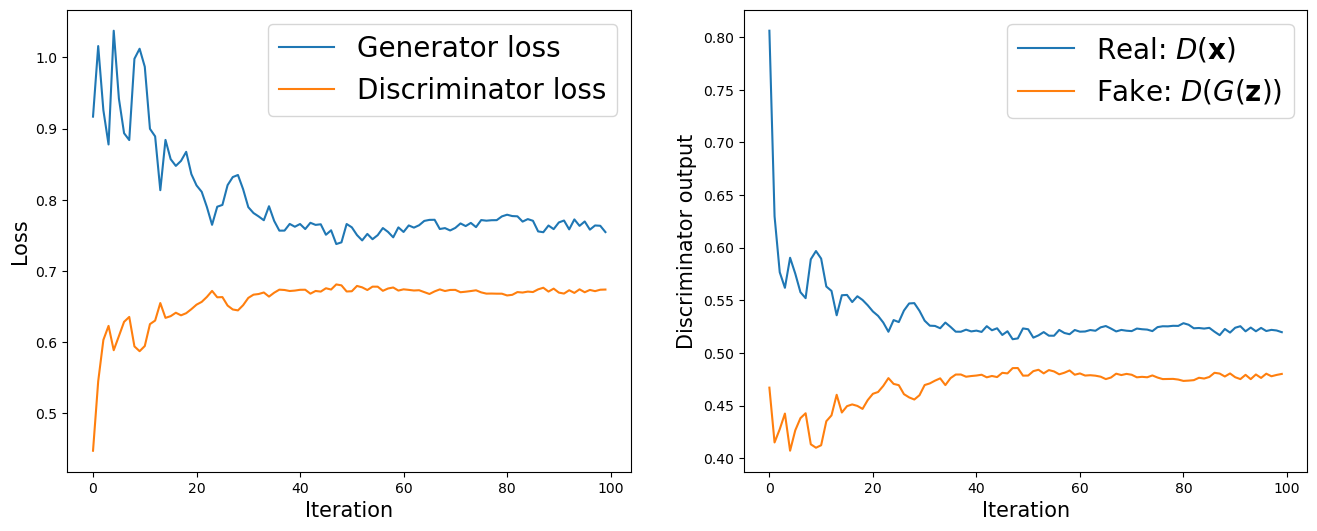

In [10]:
import itertools


fig = plt.figure(figsize=(16, 6))

## Plotting the losses
ax = fig.add_subplot(1, 2, 1)
 
plt.plot(all_g_losses, label='Generator loss')
half_d_losses = [all_d_loss/2 for all_d_loss in all_d_losses]
plt.plot(half_d_losses, label='Discriminator loss')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Loss', size=15)

## Plotting the outputs of the discriminator
ax = fig.add_subplot(1, 2, 2)
plt.plot(all_d_real, label=r'Real: $D(\mathbf{x})$')
plt.plot(all_d_fake, label=r'Fake: $D(G(\mathbf{z}))$')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Discriminator output', size=15)

#plt.savefig('figures/ch17-gan-learning-curve.pdf')
plt.show()

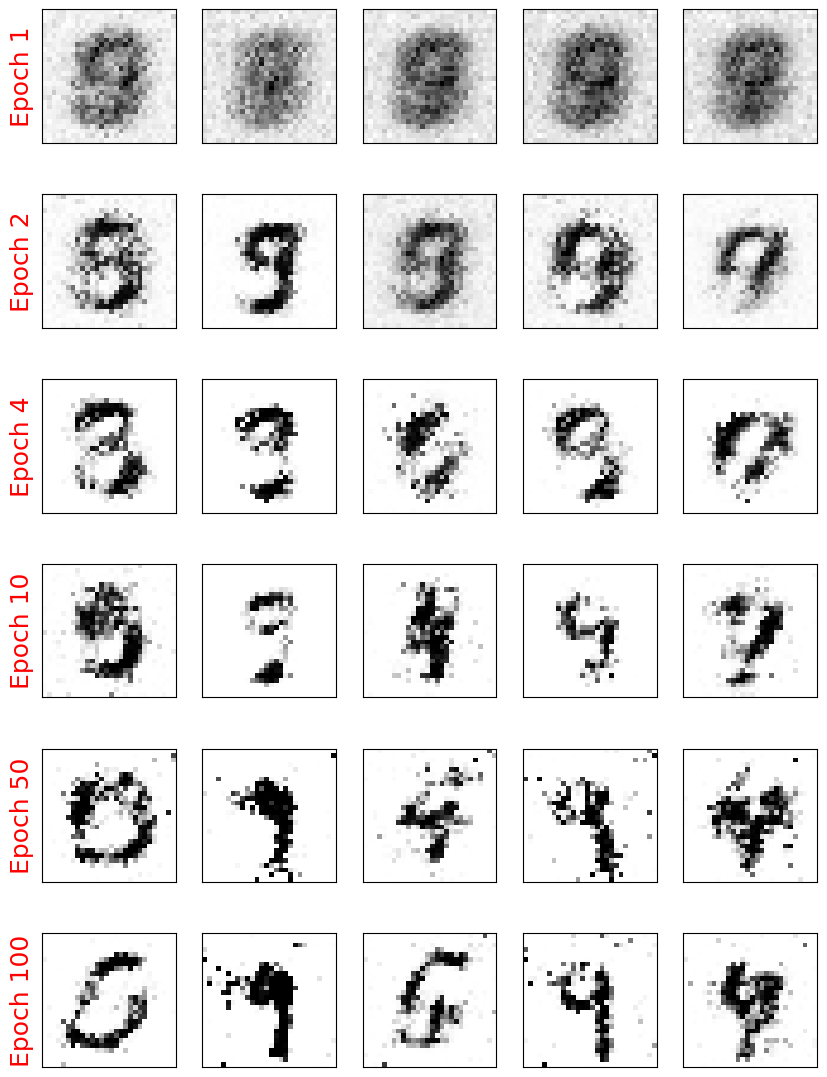

In [11]:
selected_epochs = [1, 2, 4, 10, 50, 100]
fig = plt.figure(figsize=(10, 14))
for i,e in enumerate(selected_epochs):
    for j in range(5):
        ax = fig.add_subplot(6, 5, i*5+j+1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.text(
                -0.06, 0.5, f'Epoch {e}',
                rotation=90, size=18, color='red',
                horizontalalignment='right',
                verticalalignment='center', 
                transform=ax.transAxes)
        
        image = epoch_samples[e-1][j]
        ax.imshow(image, cmap='gray_r')
    
#plt.savefig('figures/ch17-vanila-gan-samples.pdf')
plt.show()

## Calculating scores

In [13]:
import math


def distance(X, Y, sqrt):
    nX = X.size(0)
    nY = Y.size(0)
    X = X.view(nX,-1).cuda()
    X2 = (X*X).sum(1).resize_(nX,1)
    Y = Y.view(nY,-1).cuda()
    Y2 = (Y*Y).sum(1).resize_(nY,1)

    M = torch.zeros(nX, nY)
    M.copy_(X2.expand(nX,nY) + Y2.expand(nY,nX).transpose(0,1) - 2*torch.mm(X,Y.transpose(0,1)))

    del X, X2, Y, Y2
    
    if sqrt:
        M = ((M+M.abs())/2).sqrt()
    
    return M

def mmd(Mxx, Mxy, Myy, sigma) :
    scale = Mxx.mean()
    Mxx = torch.exp(-Mxx/(scale*2*sigma*sigma))
    Mxy = torch.exp(-Mxy/(scale*2*sigma*sigma))
    Myy = torch.exp(-Myy/(scale*2*sigma*sigma))
    a = Mxx.mean()+Myy.mean()-2*Mxy.mean()
    mmd = math.sqrt(max(a, 0))

    return mmd

def compute_score(fake, real , k=1, sigma=1, sqrt=True):

    Mxx = distance(real, real, False)
    Mxy = distance(real, fake, False)
    Myy = distance(fake, fake, False)

 
    print(mmd(Mxx, Mxy, Myy, sigma))

whole_dl = DataLoader(mnist_dataset, batch_size=10000, 
                      shuffle=True, drop_last=True) 
real_image = next(iter(whole_dl))[0]
compute_score(torch.from_numpy(epoch_samples[-1]), real_image)

AssertionError: Torch not compiled with CUDA enabled

## Diffusion models, basics

Diffusion models are inspired by non-equilibrium thermodynamics. They
define a Markov chain of diffusion steps to slowly add random noise to
data and then learn to reverse the diffusion process to construct
desired data samples from the noise. Unlike VAE or flow models,
diffusion models are learned with a fixed procedure and the latent
variable has high dimensionality (same as the original data).

## Problems with probabilistic models

Historically, probabilistic models suffer from a tradeoff between two
conflicting objectives: \textit{tractability} and
\textit{flexibility}. Models that are \textit{tractable} can be
analytically evaluated and easily fit to data (e.g. a Gaussian or
Laplace). However, these models are unable to aptly describe structure
in rich datasets. On the other hand, models that are \textit{flexible}
can be molded to fit structure in arbitrary data. For example, we can
define models in terms of any (non-negative) function $\phi(\boldsymbol{x})$
yielding the flexible distribution $p\left(\boldsymbol{x}\right) =
\frac{\phi\left(\boldsymbol{x} \right)}{Z}$, where $Z$ is a normalization
constant. However, computing this normalization constant is generally
intractable. Evaluating, training, or drawing samples from such
flexible models typically requires a very expensive Monte Carlo
process.

## Diffusion models
Diffusion models have several interesting features
* extreme flexibility in model structure,

* exact sampling,

* easy multiplication with other distributions, e.g. in order to compute a posterior, and

* the model log likelihood, and the probability of individual states, to be cheaply evaluated.

## Original idea

In the original formulation, one uses a Markov chain to gradually
convert one distribution into another, an idea used in non-equilibrium
statistical physics and sequential Monte Carlo. Diffusion models build
a generative Markov chain which converts a simple known distribution
(e.g. a Gaussian) into a target (data) distribution using a diffusion
process. Rather than use this Markov chain to approximately evaluate a
model which has been otherwise defined, one can  explicitly define the
probabilistic model as the endpoint of the Markov chain. Since each
step in the diffusion chain has an analytically evaluable probability,
the full chain can also be analytically evaluated.

## Diffusion learning

Learning in this framework involves estimating small perturbations to
a diffusion process. Estimating small, analytically tractable,
perturbations is more tractable than explicitly describing the full
distribution with a single, non-analytically-normalizable, potential
function.  Furthermore, since a diffusion process exists for any
smooth target distribution, this method can capture data distributions
of arbitrary form.